c:\Users\Wavid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.16074e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\Wavid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.1469e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\Wavid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.14581e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\Wavid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.14217e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym

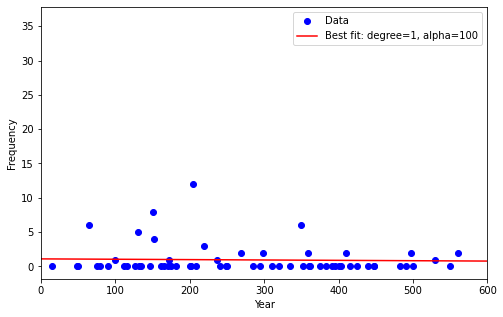

In [2]:
#Take in a csv form: Year, frequency
# From this, create a polynomial line of best fit using 
import numpy
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
# Load the CSV file
def charts_from_word(word, start_date, end_date):
    df = pd.read_csv('greek_word_usage_frequencies/' + word + '_usage_frequencies.csv')

    # Drop all columns except 'word' and 'year'
    df = df[['year', 'word_usage_at_year']]
    # Convert to numpy array
    word1 = df.to_numpy()
    line_best_fit(word1, start_date, end_date)
def line_best_fit(input, start_date, end_date):
    # Extracting the data
    X = input[:, 0].reshape(-1, 1)
    y = input[:, 1]

    # Defining the range for polynomial degrees and regularization parameter
    degrees = [1, 2, 3, 4, 5, 6]
    alphas = [0.1, 1, 5, 10, 100]

    # Creating a pipeline to streamline the process

    pipeline = Pipeline([
        ('poly', PolynomialFeatures()),
        ('ridge', Ridge())
    ])

    # Defining the parameter grid
    param_grid = {
        'poly__degree': degrees,
        'ridge__alpha': alphas
    }

    # Performing grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X, y)

    # Extracting the best parameters
    best_degree = grid_search.best_params_['poly__degree']
    best_alpha = grid_search.best_params_['ridge__alpha']

    # Fitting the model with the best parameters
    best_model = grid_search.best_estimator_

    # Plotting the results
    plt.scatter(X, y, color='blue', label='Data')
    X_plot = numpy.linspace(max(X.min(), start_date), min(X.max(), end_date), 100).reshape(-1, 1)
    y_plot = best_model.predict(X_plot)
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.xlim(max(X.min(), start_date), min(X.max(), end_date))
    plt.plot(X_plot, y_plot, color='red', label=f'Best fit: degree={best_degree}, alpha={best_alpha}')
    plt.legend()
    plt.gcf().set_size_inches(8, 5)
    plt.savefig(f'temp/current_frequency', dpi=100)

charts_from_word('α', 0, 600)